# Oblig 1

# =============
# b)
# =============
#### One dimension

In [2]:
# Importing libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed
import sklearn as skl
import numba as nb

# Defining functions

def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

In [3]:
np.random.seed(244)
x = np.sort(np.random.random(25)) # + (1/5) * np.random.normal(0, 1, 25))
y = 0
z = FrankeFunction(x, y)

# Defining design matrix
def create_X(x, dim):
    X = np.zeros((len(x), dim))
    for i in range(dim):
        X[:,i] = x**i
    return X

X = create_X(x, 5)

# Solving for beta
beta = np.linalg.inv(X.T @ X) @ X.T @ z
beta

array([  0.66860913,   3.05882352, -14.02494345,  17.80264193,
        -7.40621224])

R2
0.9986659382129334
MSE
0.00010424791388892742


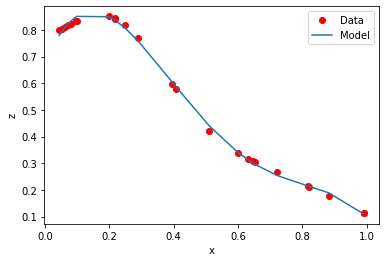

In [4]:
ztilde = X @ beta
plt.plot(x, z, "ro", label="Data")
plt.plot(x, ztilde, label="Model")
plt.xlabel("x")
plt.ylabel("z")
plt.legend()

print("R2")
print(R2(z, ztilde))
print("MSE")
print(MSE(z, ztilde))


##### Different orders of polynomials (here up to 10; should be up to 5):

Coefficients for order 1: [ 0.92361842 -0.86386409]


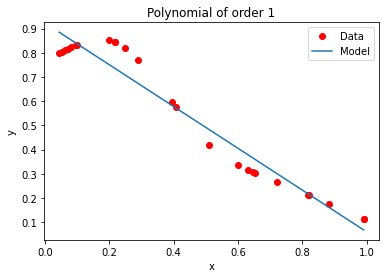

Coefficients for order 2: [ 0.91948703 -0.83335165 -0.0316232 ]


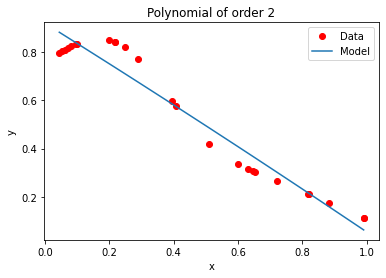

Coefficients for order 3: [ 0.78833303  0.83404496 -4.14265315  2.67224809]


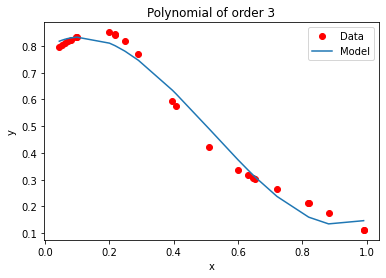

Coefficients for order 4: [  0.66860913   3.05882352 -14.02494345  17.80264193  -7.40621224]


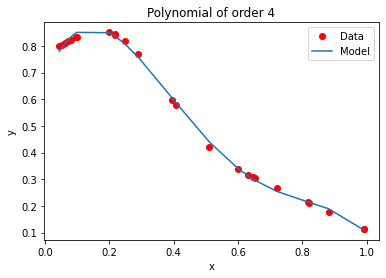

Coefficients for order 5: [  0.66792839   3.07455406 -14.12418565  18.05012878  -7.67089009
   0.10151802]


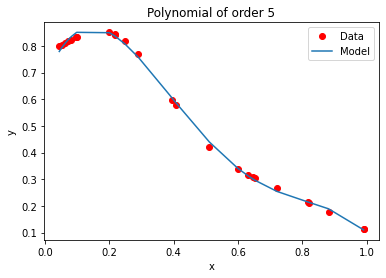

Coefficients for order 6: [ 7.79313418e-01 -1.92634523e-03  1.21114654e+01 -7.91862912e+01
  1.66789501e+02 -1.48927592e+02  4.85518667e+01]


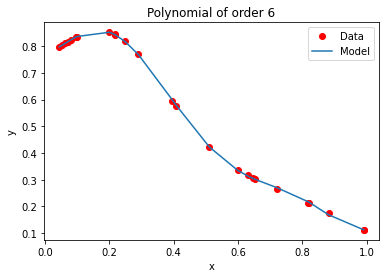

Coefficients for order 7: [   0.80404055   -0.83219798   21.59016481 -128.89784326  301.3231245
 -342.93445829  189.9134229   -40.85643326]


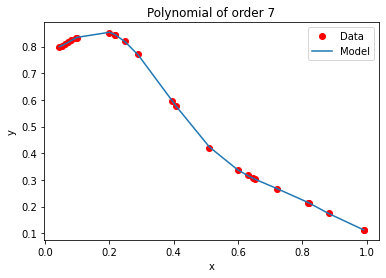

Coefficients for order 8: [ 7.78340993e-01  2.10058701e-01  6.60983988e+00 -2.80736581e+01
 -6.05840195e+01  3.91759901e+02 -6.55591497e+02  4.73108683e+02
 -1.28114337e+02]


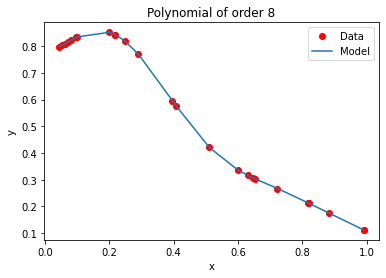

Coefficients for order 9: [ 7.54439421e-01  1.28273721e+00 -1.10111293e+01  1.12776166e+02
 -6.87464857e+02  2.05222780e+03 -3.33125780e+03  3.04340910e+03
 -1.47999247e+03  2.99385180e+02]


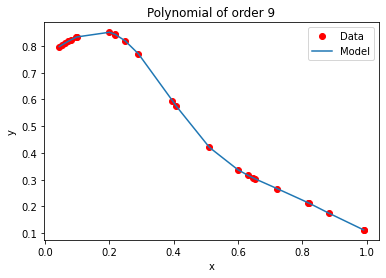

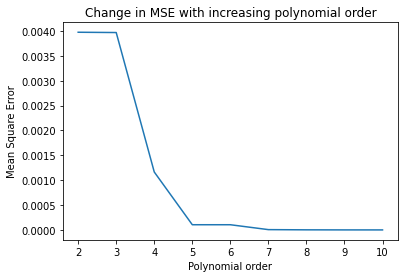

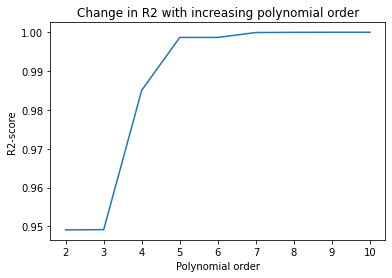

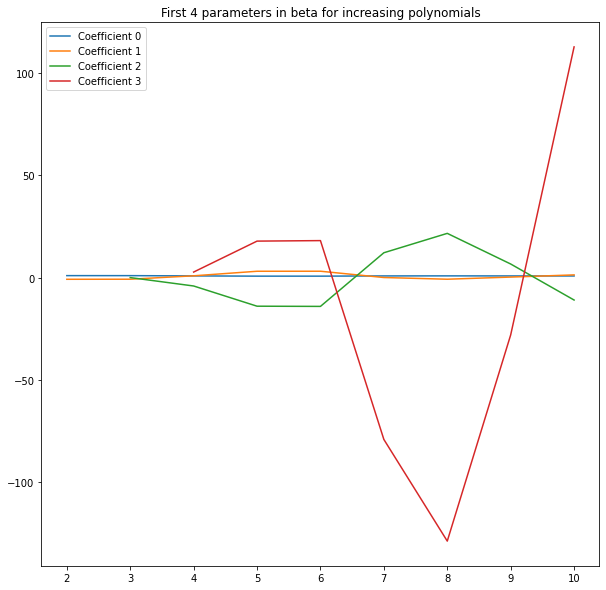

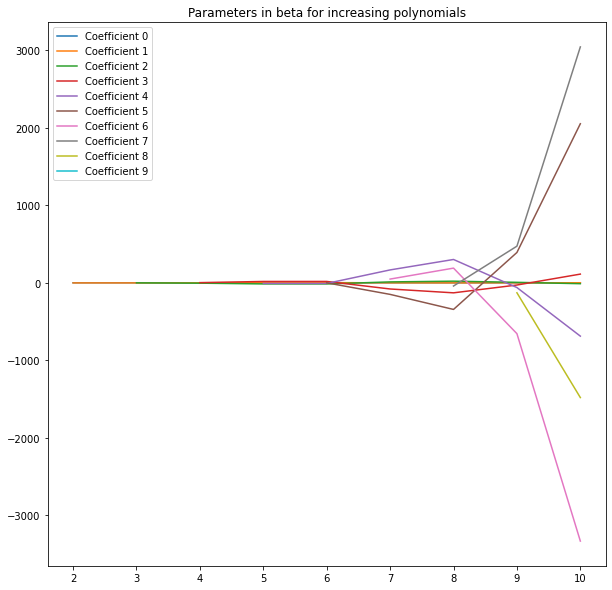

In [5]:
orders = np.arange(2, 11, 1)
MSE_arr = []
R2_arr = []
b1 = []; b2 = []; b3 = []; b4 = []; b5 = []; b6 = []; b7 = []; b8 = []; b9 = []; b10 = []
beta_arr = [b1, b2, b3, b4, b5, b6, b7, b8, b9, b10]

# Plotting fits for all polynomial orders between 2 and 10
for i in range(2, 11):
    X = create_X(x, i)
    beta = np.linalg.inv(X.T @ X) @ X.T @ z
    print(f"Coefficients for order {i-1}: {beta}")
    for b in range(len(beta)):
        beta_arr[b].append(beta[b])
    ztilde = X @ beta
    plt.plot(x, z, "ro", label="Data")
    plt.plot(x, ztilde, label="Model")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Polynomial of order {i-1}")
    plt.legend()
    plt.show()

    R2_arr.append(R2(z, ztilde))
    
    MSE_arr.append(MSE(z, ztilde))

# Plotting MSE and R2 for all polynomial orders between 2 and 10
plt.plot(orders, MSE_arr)
plt.xlabel("Polynomial order")
plt.ylabel("Mean Square Error")
plt.title("Change in MSE with increasing polynomial order")
plt.show()
plt.plot(orders, R2_arr)
plt.xlabel("Polynomial order")
plt.ylabel("R2-score")
plt.title("Change in R2 with increasing polynomial order")
plt.show()

# Plotting parameters in beta for all polynomial orders between 2 and 10
plt.figure(figsize=(10, 10)) 
for b in range(len(beta_arr)-6):
    plt.plot(orders[9 - len(beta_arr[b]):], beta_arr[b], label=f"Coefficient {b}")
plt.title("First 4 parameters in beta for increasing polynomials")
plt.legend()
plt.show()

plt.figure(figsize=(10, 10)) 
for b in range(len(beta_arr)):
    plt.plot(orders[9 - len(beta_arr[b]):], beta_arr[b], label=f"Coefficient {b}")
plt.title("Parameters in beta for increasing polynomials")
plt.legend()
plt.show()


##### Train-test-split and rescaling

In [6]:
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

order = 4
X = create_X(x, order)

# Splitting into training and testing dataset
X_train, X_test, z_train, z_test = train_test_split(X,z,test_size=0.2)

# Solving for beta
beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ z_train
beta

array([ 0.78101713,  0.90590914, -4.30745991,  2.7940366 ])

In [7]:
ztilde_train = X_train @ beta
ztilde_test = X_test @ beta

print("R2 - training")
print(R2(z_train, ztilde_train))
print("MSE - training")
print(MSE(z_train, ztilde_train))
print()
print("R2 - testing")
print(R2(z_test, ztilde_test))
print("MSE - testing")
print(MSE(z_test, ztilde_test))



R2 - training
0.9851278656408577
MSE - training
0.0011451665496060748

R2 - testing
0.9818303642864815
MSE - testing
0.0014974618945249418


In [8]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

z_train_scaled = z_train - np.mean(z_train)
z_test_scaled = z_test - np.mean(z_test)
I_ridge = np.zeros([order, order])
for i in range(len(I_ridge[0])):
    I_ridge[i][i] = 0.00000001
beta = np.linalg.inv(X_train_scaled.T @ X_train_scaled + I_ridge) @ X_train_scaled.T @ z_train

# clf = skl.LinearRegression().fit(X_train_scaled, z_train)


ztilde_train_scaled = X_train_scaled @ beta
ztilde_test_scaled = X_test_scaled @ beta

print("R2 - training, scaled")
print(R2(z_train_scaled, ztilde_train_scaled))
print("MSE - training, scaled")
print(MSE(z_train_scaled, ztilde_train_scaled))
print()
print("R2 - testing, scaled")
print(R2(z_test_scaled, ztilde_test_scaled))
print("MSE - testing, scaled")
print(MSE(z_test_scaled, ztilde_test_scaled))

R2 - training, scaled
0.9851278656408511
MSE - training, scaled
0.0011451665496065844

R2 - testing, scaled
0.9850476506637523
MSE - testing, scaled
0.0012323072249597906


### Two dimensions

In [21]:
# Defining functions


def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4 + np.random.normal(0, 1)

def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

# Generating data
n = 5
N = 1000
x = np.random.uniform(0, 1, N)
y = np.random.uniform(0, 1, N)
z = FrankeFunction(x, y)

def create_X_polynomial(x, y, n):
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n+1)*(n+2)/2)      # Number of elements in beta
    X = np.ones((N,l))

    for i in range(1,n+1):
        q = int((i)*(i+1)/2)
        for k in range(i+1):
            X[:,q+k] = (x**(i-k))*(y**k)

    return X

def linreg_polynomial(x, y, z, n):
    X = create_X_polynomial(x, y, n)

    # Solving for beta
    beta = np.linalg.inv(X.T @ X) @ X.T @ z
    return beta, X

beta, X = linreg_polynomial(x, y, z, 5)
beta

array([  0.49543109,   7.61319228,   3.6808873 , -33.7210708 ,
       -14.11031384,  -8.89675078,  47.24366989,  43.02205959,
        18.45190252,  -6.04373635, -22.34088643, -52.17330226,
        -7.31503633, -26.27879998,  25.72078479,   0.78540659,
        19.04384377,   9.59604631,  -4.66813847,  14.71888281,
       -14.6959045 ])

In [22]:
ztilde = X @ beta

print("R2")
print(R2(z, ztilde))
print("MSE")
print(MSE(z, ztilde))


R2
0.9755013519394033
MSE
0.0018625803226965548


#### Orders of polynomials:

Coefficients for order 1: 
[ 1.20099825 -1.0019918  -0.66042391  0.10740447  0.82309421 -0.40757322]
Coefficients for order 2: 
[ 1.0351601  -0.46385146  1.2833419  -1.56333524  1.83800071 -6.2526989
  0.98849089  0.40290201 -1.40430394  4.38880807]
Coefficients for order 3: 
[  0.71168552   3.97085763   2.89731097 -18.93691146  -1.44198541
 -11.71238913  25.25289961   6.84722732   0.39763811  11.82627372
 -11.06785893  -4.41098857   0.15739209  -1.22253096  -3.33198811]
Coefficients for order 4: 
[  0.49543109   7.61319228   3.6808873  -33.7210708  -14.11031384
  -8.89675078  47.24366989  43.02205959  18.45190252  -6.04373635
 -22.34088643 -52.17330226  -7.31503633 -26.27879998  25.72078479
   0.78540659  19.04384377   9.59604631  -4.66813847  14.71888281
 -14.6959045 ]


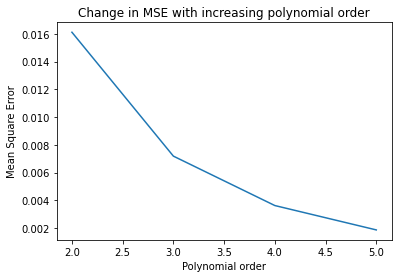

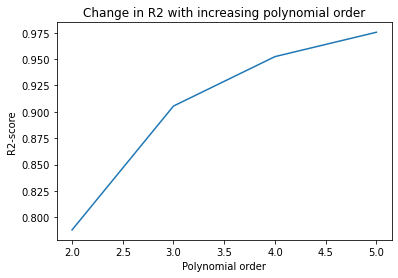

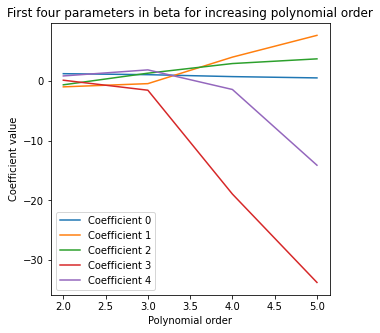

In [35]:
orderrange = 5
orders = np.arange(2, orderrange + 1, 1)
MSE_arr = []
R2_arr = []
beta_arr = []

# Plotting fits for all polynomial orders between 2 and 5
for i in range(2, orderrange + 1):
    beta, X = linreg_polynomial(x, y, z, i)
    print(f"Coefficients for order {i-1}: \n{beta}")
    beta_arr.append(beta)
    ztilde = X @ beta

    R2_arr.append(R2(z, ztilde))
    
    MSE_arr.append(MSE(z, ztilde))



# Plotting MSE and R2 for all polynomial orders between 2 and 5
plt.plot(orders, MSE_arr)
plt.xlabel("Polynomial order")
plt.ylabel("Mean Square Error")
plt.title("Change in MSE with increasing polynomial order")
plt.show()
plt.plot(orders, R2_arr)
plt.xlabel("Polynomial order")
plt.ylabel("R2-score")
plt.title("Change in R2 with increasing polynomial order")
plt.show()

# Plotting parameters in beta for all polynomial orders between 2 and 5
plt.figure(figsize=(5, 5)) 
for i in range(orderrange):
    plt.plot(orders, [b[i] for b in beta_arr], label=f"Coefficient {i}")
plt.title("First four parameters in beta for increasing polynomial order")
plt.xlabel("Polynomial order")
plt.ylabel("Coefficient value")
plt.legend()
plt.show()

#### Train-test-split and rescaling:

In [24]:
# Splitting into training and testing dataset
X_train, X_test, z_train, z_test = train_test_split(X,z,test_size=0.2)

# Solving for beta
beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ z_train
beta

array([  0.47455146,   7.63334969,   4.04621925, -33.32941147,
       -14.32442595, -10.9019814 ,  45.49437643,  42.99186608,
        19.43038986,  -1.75281742, -19.94723042, -52.03774571,
        -7.42176153, -27.59588921,  21.72457322,  -0.25737665,
        19.0062612 ,   9.29853075,  -4.21466729,  15.12478949,
       -13.32277854])

In [25]:
ztilde_train = X_train @ beta
ztilde_test = X_test @ beta

print("R2 - training")
print(R2(z_train, ztilde_train))
print("MSE - training")
print(MSE(z_train, ztilde_train))
print()
print("R2 - testing")
print(R2(z_test, ztilde_test))
print("MSE - testing")
print(MSE(z_test, ztilde_test))


R2 - training
0.9755827848156657
MSE - training
0.001874868683536358

R2 - testing
0.9739233555860364
MSE - testing
0.0018951145485039636


In [26]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

z_train_scaled = z_train - np.mean(z_train)
z_test_scaled = z_test - np.mean(z_test)
n = int((order + 2)*(order + 3)/2)
I_ridge = np.zeros([n, n])
for i in range(len(I_ridge[0])):
    I_ridge[i][i] = 0.00000001
beta = np.linalg.inv(X_train_scaled.T @ X_train_scaled + I_ridge) @ X_train_scaled.T @ z_train

# clf = skl.LinearRegression().fit(X_train_scaled, z_train)


ztilde_train_scaled = X_train_scaled @ beta
ztilde_test_scaled = X_test_scaled @ beta

print("R2 - training, scaled")
print(R2(z_train_scaled, ztilde_train_scaled))
print("MSE - training, scaled")
print(MSE(z_train_scaled, ztilde_train_scaled))
print()
print("R2 - testing, scaled")
print(R2(z_test_scaled, ztilde_test_scaled))
print("MSE - testing, scaled")
print(MSE(z_test_scaled, ztilde_test_scaled))

R2 - training, scaled
0.9755827848150594
MSE - training, scaled
0.001874868683582907

R2 - testing, scaled
0.9646801570289903
MSE - testing, scaled
0.0025668620242178504


# ================
# c)
# ================